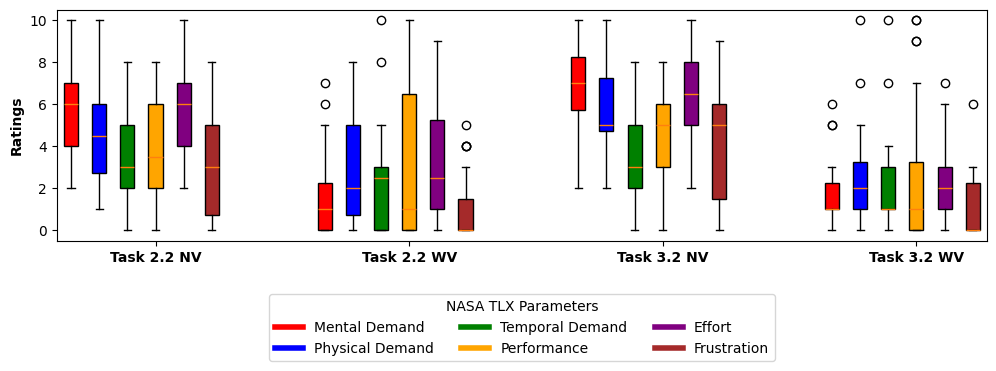

In [44]:
# -- NASA TLX Visualization --

import pandas as pd
import matplotlib.pyplot as plt

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'NASATLX'

# Load the Excel file from the specified path and sheet
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define scenarios and parameters
scenarios = ['Task 2.2 NV', 'Task 2.2 WV', 'Task 3.2 NV', 'Task 3.2 WV']
parameters = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Define colors for each parameter (consistent across scenarios)
colors = {
    'Mental Demand': 'red',
    'Physical Demand': 'blue',
    'Temporal Demand': 'green',
    'Performance': 'orange',
    'Effort': 'purple',
    'Frustration': 'brown'
}

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(12, 3))

# Iterate over each scenario
for scenario_index, scenario in enumerate(scenarios):
    # Create a list to hold data for each parameter in the scenario
    scenario_data = []
    
    # Iterate over each parameter
    for parameter in parameters:
        # Create the column name for the current parameter and scenario
        col_name = f'{scenario} {parameter}'
        
        parameter_data = pd.to_numeric(data[col_name], errors='coerce').dropna()
        
        # Append the data to the scenario data list
        scenario_data.append(parameter_data)
    
    # Plot the box plot for the current scenario
    box_positions = [(scenario_index * (len(parameters) + 3)) + i for i in range(len(parameters))]
    boxplot = ax.boxplot(scenario_data, positions=box_positions, patch_artist=True, notch=False)

    # Color each box plot according to the parameter
    for i, box in enumerate(boxplot['boxes']):
        box.set_facecolor(colors[parameters[i]])

# Customize the plot
# Set x-ticks: one set of labels for each scenario, placing it in the middle of each group of parameters
ax.set_xticks([(i * (len(parameters) + 3)) + len(parameters) / 2 for i in range(len(scenarios))])
ax.set_xticklabels(scenarios, fontweight='bold')
ax.set_ylabel('Ratings', fontweight='bold')

# Add a legend: one handle per parameter
handles = [plt.Line2D([0], [0], color=colors[parameter], lw=4) for parameter in parameters]
ax.legend(handles, parameters, title='NASA TLX Parameters', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Show the plot
plt.show()


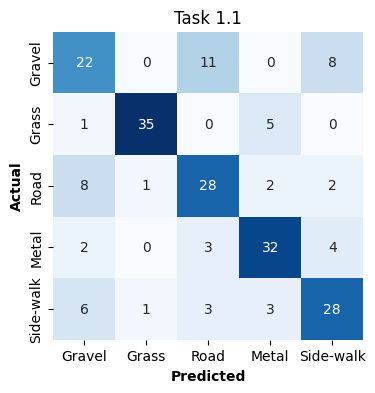

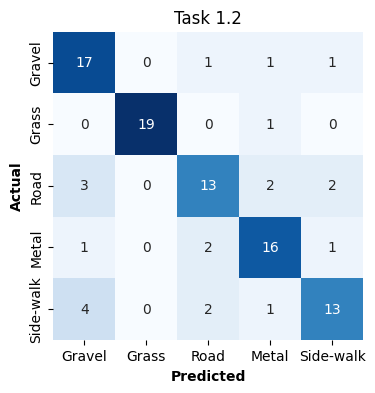

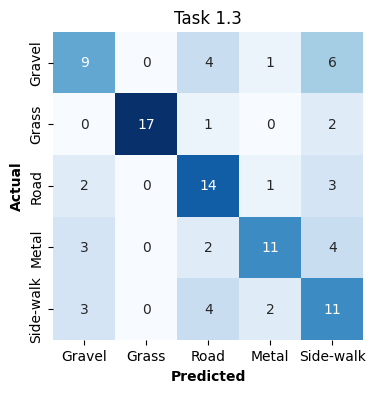

In [50]:
# -- Task 1: Texture Identification Success Rate Visualization --

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK1 CONFUSION MATRIX'

# Read Excel data from the specified file path and sheet name into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Define the list of textures
textures = ['Gravel', 'Grass', 'Road', 'Metal', 'Side-walk']

# Iterate through each scenario and create a confusion matrix and heat map
for scenario_num in range(1, 4):
    # Define the prefix for the current scenario
    prefix = f'TASK 1.{scenario_num}'
    
    # Search for columns that match the prefix and textures
    scenario_columns = [f'{prefix} {texture}' for texture in textures]
    
    # Extract the actual and predicted textures for the scenario
    actual_textures = []
    predicted_textures = []
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Iterate through each column in scenario_columns
        for column in scenario_columns:
            # Extract the actual texture based on the column name
            actual_texture = column.split()[-1]  # Extract texture from the column name (e.g., 'TASK 1.1 Gravel' -> 'Gravel')
            
            # Extract the predicted value from the current row and column
            predicted = row[column]
            
            # Handle "✔" mark: if the predicted value is "✔", consider it a correct prediction (use actual texture)
            if predicted == '✔':
                predicted_textures.append(actual_texture)
            else:
                predicted_textures.append(predicted)
            
            # Add the actual texture to the actual_textures list
            actual_textures.append(actual_texture)
    
    # Compute the confusion matrix for the scenario
    cm = confusion_matrix(actual_textures, predicted_textures, labels=textures)
    
    # Create a heat map of the confusion matrix for the scenario
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
                xticklabels=textures, yticklabels=textures)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.title(f'Task 1.{scenario_num}')
    plt.show()



In [69]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK 1 TWO WAY ANOVA'

# Read data from the Excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Clean column names by replacing spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the formula for the two-way ANOVA
formula = 'Success_Rate_of_Identification ~ C(Audio) + C(Haptic) + C(Audio):C(Haptic)'

# Create the model
model = smf.ols(formula=formula, data=df)

# Fit the model
results = model.fit()

# Print the summary of the results
print(results.summary())



                                  OLS Regression Results                                  
Dep. Variable:     Success_Rate_of_Identification   R-squared:                       0.182
Model:                                        OLS   Adj. R-squared:                  0.086
Method:                             Least Squares   F-statistic:                     1.891
Date:                            Mon, 29 Apr 2024   Prob (F-statistic):              0.181
Time:                                    21:14:47   Log-Likelihood:                 13.957
No. Observations:                              20   AIC:                            -21.91
Df Residuals:                                  17   BIC:                            -18.93
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

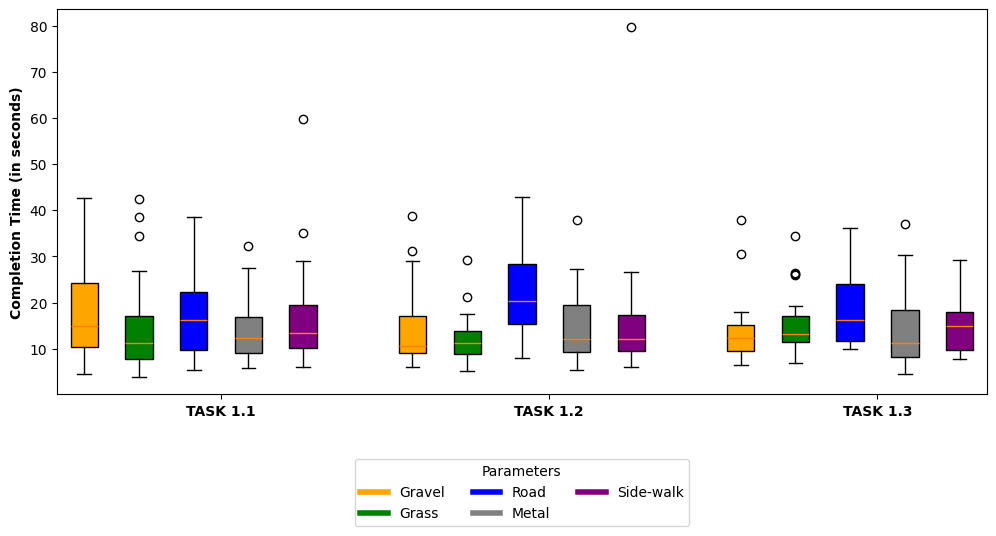

In [19]:
# -- TASK 1 TASK (SUCCESSFUL & UNSUCCESSFUL) COMPLETION TIME Visualization --

import pandas as pd
import matplotlib.pyplot as plt

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK 1 COMPLETION TIME'

# Load the Excel file from the specified path and sheet
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define scenarios and parameters
scenarios = ['TASK 1.1', 'TASK 1.2', 'TASK 1.3']
parameters = ['Gravel','Grass','Road','Metal','Side-walk']

# Define colors for each parameter (consistent across scenarios)
colors = {
    'Road': 'blue',
    'Grass': 'green',
    'Gravel': 'orange',
    'Side-walk': 'purple',
    'Metal': 'grey'
}

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(12, 5))

# Iterate over each scenario
for scenario_index, scenario in enumerate(scenarios):
    # Create a list to hold data for each parameter in the scenario
    scenario_data = []
    
    # Iterate over each parameter
    for parameter in parameters:
        # Create the column name for the current scenario and parameter
        col_name = f'{scenario} {parameter}'
        
        try:
            # Get the data from the corresponding column, converting it to numeric and dropping NaN values
            parameter_data = pd.to_numeric(data[col_name], errors='coerce').dropna()
            
            # Append the data to the list
            scenario_data.append(parameter_data)
        except KeyError:
            # Handle missing columns gracefully by skipping them
            print(f"Column '{col_name}' not found in the data.")
            scenario_data.append([])
    
    # Plot the box plot for the current scenario
    box_positions = [(scenario_index * (len(parameters) + 1)) + i for i in range(len(parameters))]
    boxplot = ax.boxplot(scenario_data, positions=box_positions, patch_artist=True, widths=0.5)

    # Color each box plot according to the parameter
    for i, box in enumerate(boxplot['boxes']):
        box.set_facecolor(colors[parameters[i]])

# Customize the plot
ax.set_ylabel('Completion Time (in seconds)', fontweight='bold')
ax.set_xticks([(i * (len(parameters) + 1)) + len(parameters) / 2 for i in range(len(scenarios))])
ax.set_xticklabels(scenarios, fontweight='bold')

# Add a legend for parameters
handles = [plt.Line2D([0], [0], color=colors[parameter], lw=4) for parameter in parameters]
ax.legend(handles, parameters, title='Parameters', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.show()

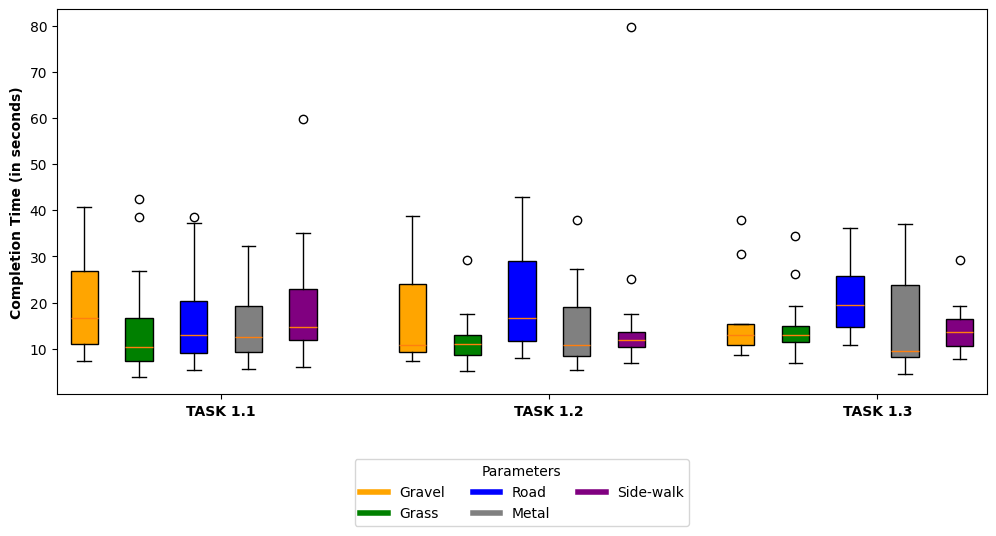

In [13]:
# -- TASK 1 SUCCESSFUL TASK COMPLETION TIME Visualization --

import pandas as pd
import matplotlib.pyplot as plt

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK 1 SUCCESS COMPLETION TIME'

# Load the Excel file from the specified path and sheet
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define scenarios and parameters
scenarios = ['TASK 1.1', 'TASK 1.2', 'TASK 1.3']
parameters = ['Gravel','Grass','Road','Metal','Side-walk']

# Define colors for each parameter (consistent across scenarios)
colors = {
    'Road': 'blue',
    'Grass': 'green',
    'Gravel': 'orange',
    'Side-walk': 'purple',
    'Metal': 'grey'
}

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(12, 5))

# Iterate over each scenario
for scenario_index, scenario in enumerate(scenarios):
    # Create a list to hold data for each parameter in the scenario
    scenario_data = []
    
    # Iterate over each parameter
    for parameter in parameters:
        # Create the column name for the current scenario and parameter
        col_name = f'{scenario} {parameter}'
        
        try:
            # Get the data from the corresponding column, converting it to numeric and dropping NaN values
            parameter_data = pd.to_numeric(data[col_name], errors='coerce').dropna()
            
            # Append the data to the list
            scenario_data.append(parameter_data)
        except KeyError:
            # Handle missing columns gracefully by skipping them
            print(f"Column '{col_name}' not found in the data.")
            scenario_data.append([])
    
    # Plot the box plot for the current scenario
    box_positions = [(scenario_index * (len(parameters) + 1)) + i for i in range(len(parameters))]
    boxplot = ax.boxplot(scenario_data, positions=box_positions, patch_artist=True, widths=0.5)

    # Color each box plot according to the parameter
    for i, box in enumerate(boxplot['boxes']):
        box.set_facecolor(colors[parameters[i]])

# Customize the plot
ax.set_ylabel('Completion Time (in seconds)', fontweight='bold')
ax.set_xticks([(i * (len(parameters) + 1)) + len(parameters) / 2 for i in range(len(scenarios))])
ax.set_xticklabels(scenarios, fontweight='bold')

# Add a legend for parameters
handles = [plt.Line2D([0], [0], color=colors[parameter], lw=4) for parameter in parameters]
ax.legend(handles, parameters, title='Parameters', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.show()

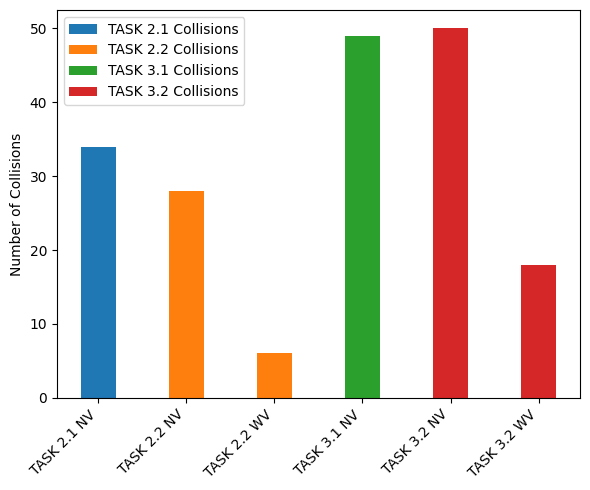

In [68]:
# -- Total collsion by all the partcipants for each task Visualization --
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK 2 AND 3 VEHICLE COLLISION'  # Ensure the sheet name is correct

# Load the data from the specified file path and sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Define tasks and categories
tasks = ['TASK 2.1', 'TASK 2.2', 'TASK 3.1', 'TASK 3.2']
categories = ['NV', 'WV']

# Create a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(6, 5))

# Initialize a list to hold mean values
mean_values = []

# Initialize lists for x positions and labels
x_positions = []
labels = []

# Iterate over each task
current_x_position = 0  # Track the current x position as a cumulative counter

for task_index, task in enumerate(tasks):
    # Initialize lists to hold collision counts for each category in the task
    collisions = []
    
    # Iterate over each category
    for category_index, category in enumerate(categories):
        # Define the column name for the current task and category
        col_name = f'{task} {category}'
        
        # Check if the current task and category combination should be excluded
        if (task == 'TASK 2.1' and category == 'WV') or (task == 'TASK 3.1' and category == 'WV'):
            continue
        
        # Check if the column exists in the data
        if col_name in data.columns:
            # Calculate the sum of collisions for the current task-category combination
            collision_sum = data[col_name].sum()
            collisions.append(collision_sum)
            
            # Calculate the mean value of collisions
            mean_values.append(data[col_name].mean())
        else:
            # If the column does not exist, append 0 for the bar chart
            collisions.append(0)
        
        # Store the current x position and label
        x_positions.append(current_x_position)
        labels.append(f'{task} {category}')
        
        # Increment the current x position
        current_x_position += 1

    # Plot the bar chart for the current task
    ax.bar(x_positions[-len(collisions):], collisions, width=0.4, label=f'{task} Collisions')

# Set x-ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')

# Customize the plot
ax.set_ylabel('Number of Collisions')
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


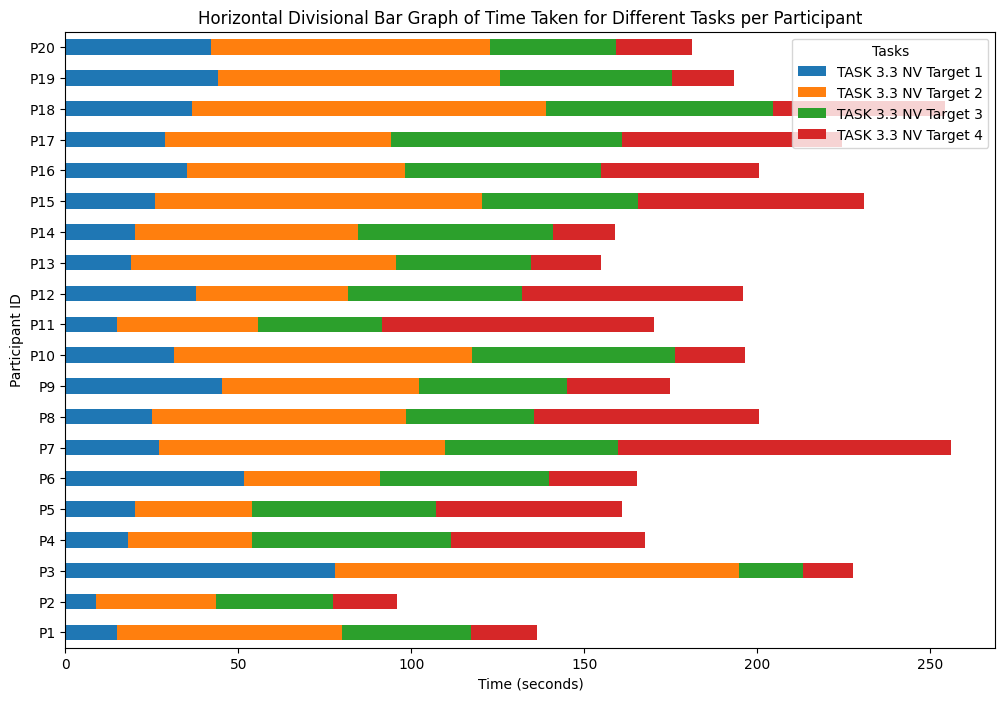

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path and sheet name
file_path = 'D:/GEM Lab/GEMLabHCIResearch/User Study Quant Data Excel Sheets/User Study Data for Viz.xlsx'
sheet_name = 'TASK 3 TIME TO COMPLETE TASK'

# Read the data from the Excel file
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Plot a horizontal stacked bar chart for each participant
data.set_index('Participant ID', inplace=True)

# Columns representing the task times for each target
target_columns = ['TASK 3.3 NV Target 1', 'TASK 3.3 NV Target 2', 'TASK 3.3 NV Target 3', 'TASK 3.3 NV Target 4']

# Plotting the horizontal stacked bar chart
ax = data[target_columns].plot(kind='barh', stacked=True, figsize=(12, 8))

# Add labels and title
ax.set_ylabel('Participant ID')
ax.set_xlabel('Time (seconds)')
ax.set_title('Horizontal Divisional Bar Graph of Time Taken for Different Tasks per Participant')

# Adding a legend for the different task categories
ax.legend(title='Tasks', loc='upper right')

# Show the plot
plt.show()

